# Кластеризация акций с использованием алгоритма K-Means на Python

Эффективность инвестиционного портфеля, его качественная оценка, основывается на нахождении компромисса между доходностью и риском. Однако рассмотрение акций, входящих в его состав со стороны объединения риска и доходности в один качественный показатель позволяет сделать вывод об эффективности каждой отдельной акции и подойтик процессу отбора акций наиболее рационально.
Здесь, будет рассмотрен процесс вычисления  доходности и риска акций, а затем разделение акций по кластерам исходя из их соотношения риск-доходность с использованием алгоритма K-Means .

# Российский рынок

Кластеризацию будем проводить для акций торгуемых на Московской Биржи по сотоянию на ноябрь 2018 года и с доступными историческими данными на 2 года.

In [1]:
import pandas as pd
import pandas_datareader as dr
import pickle
import math
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq

import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = ["MSNG",
"AGRO",
"ENPL",
"FIVE",
"POLY",
"RUAL",
"YNDX",
"QIWI",
"UNAC",
"DZRD",
"DZRDP",
"DIOD",
"ISKJ",
"LVHK",
"NAUK",
"NSVZ",
"RLMN",
"RLMNP",
"LIFE",
"AVAZ",
"AVAZP",
"ALRS",
"ALNU",
"ABRD",
"AVAN",
"AKRN",
"APTK",
"ARSA",
"ASSB",
"AMEZ",
"AFLT",
"BSPB",
"FTRE",
"BISV",
"BISVP",
"BANE",
"BANEP",
"BLNG",
"BELU",
"ALBK",
"BRZL",
"VSMO",
"VTBR",
"VLHZ",
"VDSB",
"VJGZ",
"VJGZP",
"VZRZ",
"VZRZP",
"VGSB",
"VGSBP",
"VSYD",
"VSYDP",
"GAZA",
"GAZAP",
"GAZT",
"GAZS",
"GAZC",
"GAZP",
"GRNT",
"GMKN",
"GTRK",
"RTGZ",
"SIBN",
"HALS",
"FESH",
"DVEC",
"DASB",
"DSKY",
"ZVEZ",
"ZILL",
"ZMZN",
"ZMZNP",
"RUSI",
"OPIN",
"IRKT",
"IGSTP",
"IGST",
"IDVP",
"IRAO",
"IRGZ",
"KMAZ",
"KMEZ",
"KTSB",
"KTSBP",
"KLSB",
"KCHE",
"KCHEP",
"TGKD",
"TGKDP",
"KOGK",
"KROTP",
"KROT",
"KRSB",
"KRSBP",
"KUBE",
"KBTK",
"KUZB",
"KAZT",
"KAZTP",
"KGKC",
"KGKCP",
"LSRG",
"LKOH",
"LPSB",
"LNZLP",
"LNZL",
"LNTA",
"LSNGP",
"LSNG",
"MVID",
"MGTSP",
"MGTS",
"MERF",
"CBOM",
"MAGN",
"MSRS",
"MRKZ",
"MRKK",
"MRKU",
"MRKP",
"MRKC",
"MRKV",
"MRKS",
"MRKY",
"MTSS",
"MAGE",
"MAGEP",
"MGNT",
"MISBP",
"MFON",
"MFGS",
"MFGSP",
"MTLR",
"MTLRP",
"MRSB",
"MORI",
"MOEX",
"MOBB",
"MSTT",
"MSST",
"MUGS",
"MUGSP",
"NKNC",
"NKNCP",
"NKHP",
"NLMK",
"NMTP",
"NFAZ",
"NKSH",
"NVTK",
"UWGN",
"OGKB",
"UCSS",
"OMZZP",
"OBUV",
"OMSH",
"KZOS",
"KZOSP",
"PIKK",
"PRTK",
"PAZA",
"PMSBP",
"PMSB",
"PLSM",
"PLZL",
"PRMB",
"RBCM",
"RGSS",
"RDRB",
"CHGZ",
"ROST",
"RASP",
"ROSB",
"ROSN",
"RSTI",
"RSTIP",
"RTKM",
"RTKMP",
"AQUA",
"HYDR",
"RUGR",
"ROLO",
"RUSP",
"RNFT",
"RZSB",
"SFIN",
"SZPR",
"MGNZ",
"SVAV",
"SAGO",
"SAGOP",
"KRKN",
"KRKNP",
"SARE",
"SAREP",
"SLEN",
"SBER",
"SBERP",
"CHMF",
"SELG",
"SELGP",
"SIBG",
"AFKS",
"JNOSP",
"JNOS",
"STSB",
"STSBP",
"SNGS",
"SNGSP",
"TANL",
"TGKA",
"TGKN",
"TGKB",
"TGKBP",
"TUZA",
"KRKO",
"KRKOP",
"TRMK",
"KBSB",
"VRSBP",
"VRSB",
"MISB",
"NNSB",
"NNSBP",
"RTSB",
"RTSBP",
"YRSB",
"YRSBP",
"TNSE",
"TORS",
"TORSP",
"TASB",
"TASBP",
"TATN",
"TATNP",
"TTLK",
"CNTL",
"CNTLP",
"TRCN",
"TRNFP",
"URKZ",
"USBN",
"URKA",
"FEES",
"NPOF",
"PHOR",
"HIMC",
"HIMCP",
"WTCM",
"WTCMP",
"PRFN",
"CHKZ",
"CHMK",
"CHEP",
"CLSB",
"CLSBP",
"GCHE",
"ELTZ",
"ENRU",
"RKKE",
"UTAR",
"UNKL",
"UKUZ",
"UPRO",
"YAKG",
"YKENP",
"YKEN"]

In [386]:
data = pd.DataFrame()
for symbol in stocks:
    data[symbol] = pd.read_csv('./csv/'+symbol+'.csv', parse_dates=['Date'], index_col=0)['Close']['2017-01-01':'2018-10-01']

Удаляем из таблицы акции у которых пропусков (NaN) больше 50

In [387]:
isnull = data.isnull().sum()
for ticker in stocks:     #if too many null entries for given stock, exclude from analysis
    try:
        if isnull[ticker] > 50:
            data.drop(ticker, axis=1, inplace=True)
    except:
        pass

In [388]:
# Delete NaN rows
#data.dropna(inplace=True)

In [389]:
df = data.copy()

In [390]:
data.head(5)

,MSNG,AGRO,POLY,RUAL,YNDX,QIWI,UNAC,DZRDP,DIOD,ISKJ,...,CHMK,CLSBP,GCHE,ELTZ,ENRU,RKKE,UTAR,UKUZ,UPRO,YKEN
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,2.5010,811.0,643.5,27.22,1241.0,782.0,0.5650,1580.0,3.26,18.00,...,4020.0,0.1095,771.0,651.0,1.018,5960.0,10.54,950.0,2.914,0.295
2017-01-04,2.5015,818.0,662.5,27.11,1239.0,784.0,0.5665,1550.0,3.26,18.00,...,3965.0,0.1090,769.0,651.0,1.004,6000.0,10.48,925.0,2.909,0.294
2017-01-05,2.5000,816.0,661.5,27.15,1252.0,779.0,0.5490,1560.0,3.26,18.10,...,4000.0,0.1070,771.0,662.0,1.007,6000.0,10.38,950.0,2.884,0.295
2017-01-06,2.4550,820.0,654.0,26.81,1291.0,775.0,0.5400,1560.0,3.26,18.15,...,3985.0,0.1125,770.0,687.0,1.013,6000.0,10.29,936.0,2.870,0.300
2017-01-09,2.5145,836.0,662.0,26.93,1317.0,776.0,0.5455,1650.0,3.26,18.30,...,3970.0,0.1140,779.0,720.0,1.014,6070.0,10.29,960.0,2.912,0.304


Вначале выберем на сколько кластеров следует разделить данные. Для этого используем метод “Elbow Curve”, цель которого - выявление связи между количеством выбранных кластеров и суммарной квадратической ошибкой, полученной в результате работы заданного числа кластеров. 

Визуализация поможет выявить оптимальное число кластеров. Данное число будет являться компромиссом между стремлением минимизировать ошибку и в то же время сократить число кластеров. На графике отразиться в эффекте «локтя».

In [391]:
prices_df = data.copy()

In [392]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * math.sqrt(252)

In [393]:
returns.head()

,Returns,Volatility
MSNG,-0.061173,0.302541
AGRO,-0.081192,0.214042
POLY,-0.082644,0.293421
RUAL,0.132138,0.458986
YNDX,0.364953,0.334487


In [394]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [395]:
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

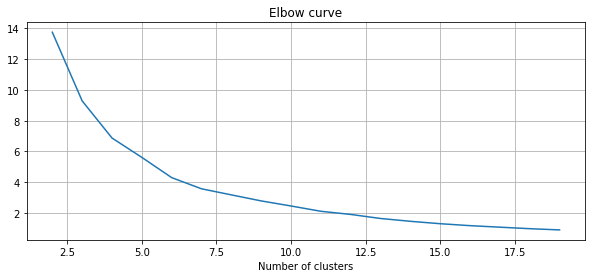

In [396]:
plt.figure(figsize=(10, 4))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Number of clusters');

По мере достижения количеством кластеров значения 5 происходит замедление падения показателей суммарной квадратической ошибки для каждого последующего увеличения числа кластеров, что свидетельствует о достижении компромисса между минимизаций двух параметров: числом кластеров и ошибке их применения, следовательно, оптимально разбиение на пять групп.

In [397]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .002     # point in the mesh [x_min, x_max]x[y_min, y_max].

x_min, x_max = data[:, 0].min() - 0.2, data[:, 0].max() + 0.2
y_min, y_max = data[:, 1].min() - 0.2, data[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [446]:
n_clusters = 5
km = KMeans(n_clusters=n_clusters) 
km.fit(data);

In [447]:
centroids = km.cluster_centers_

In [448]:
# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

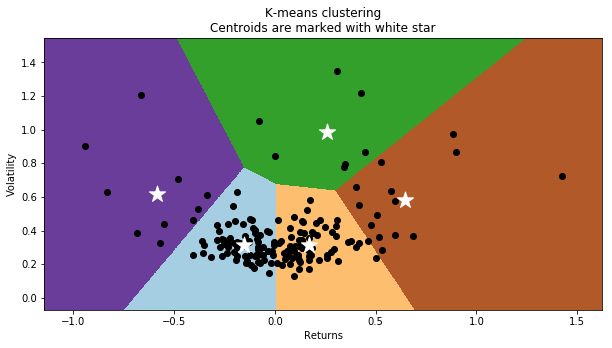

In [449]:
# some plotting using numpy's logical indexing
plt.figure(figsize=(10,5))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Plot data
plt.plot(data[:, 0], data[:, 1], '.k', markersize=12)

# Plot the centroids as a white X
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=290, 
            color='w', zorder=10)

plt.title('K-means clustering\n'
          'Centroids are marked with white star');
plt.xlabel('Returns')
plt.ylabel('Volatility');

Finally to get the details of which stock is actually in which cluster we can run the following line of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format:

Наконец, чтобы получить подробную информацию о том, какая акция фактически находится в каком кластере и какова его общая тенденция, мы можем запустить следующую строку кода:

In [450]:
returns.head()

,Returns,Volatility
MSNG,-0.061173,0.302541
AGRO,-0.081192,0.214042
POLY,-0.082644,0.293421
RUAL,0.132138,0.458986
YNDX,0.364953,0.334487


Из исходных котировок акций вычислим ежеднеыную доходность и потом построим по ним графики

In [466]:
r = df.pct_change()
r.head()

,MSNG,AGRO,POLY,RUAL,YNDX,QIWI,UNAC,DZRDP,DIOD,ISKJ,...,CHMK,CLSBP,GCHE,ELTZ,ENRU,RKKE,UTAR,UKUZ,UPRO,YKEN
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.000200,0.008631,0.029526,-0.004041,-0.001612,0.002558,0.002655,-0.018987,0.0,0.000000,...,-0.013682,-0.004566,-0.002594,0.000000,-0.013752,0.006711,-0.005693,-0.026316,-0.001716,-0.003390
2017-01-05,-0.000600,-0.002445,-0.001509,0.001475,0.010492,-0.006378,-0.030891,0.006452,0.0,0.005556,...,0.008827,-0.018349,0.002601,0.016897,0.002988,0.000000,-0.009542,0.027027,-0.008594,0.003401
2017-01-06,-0.018000,0.004902,-0.011338,-0.012523,0.031150,-0.005135,-0.016393,0.000000,0.0,0.002762,...,-0.003750,0.051402,-0.001297,0.037764,0.005958,0.000000,-0.008671,-0.014737,-0.004854,0.016949
2017-01-09,0.024236,0.019512,0.012232,0.004476,0.020139,0.001290,0.010185,0.057692,0.0,0.008264,...,-0.003764,0.013333,0.011688,0.048035,0.000987,0.011667,0.000000,0.025641,0.014634,0.013333


Создаем словарь clusters, где будем хранить названия акций для каждого кластера

In [454]:
idx,_ = vq(data,centroids)
clusters = {}

for i in list(set(idx)):
    clusters[i] = []

for name, cluster in zip(returns.index,idx):
    clusters[cluster].append(name)

Вычисляем среднее по всем акциям в каждом кластере и добавляем их как новый столбец

In [455]:
for i in list(set(idx)):
    s = 'avg' + str(i)
    r[s] = r[clusters[i]].mean(axis=1)

Построим для каждого кластера куммулятивную сумму всех акций входящих в него и среднюю для акций (красная линия)

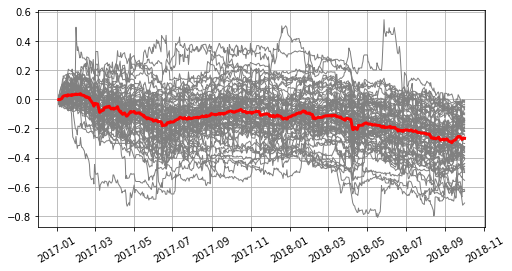

In [456]:
n = 0
plt.figure(figsize=(8,4))

for stock in clusters[n]:
    plt.plot(r[stock].cumsum(), 'gray', linewidth=1)

s = 'avg' + str(n)
plt.plot(r[s].cumsum(), 'red', linewidth=3);
plt.xticks(rotation=30);
plt.grid(True)

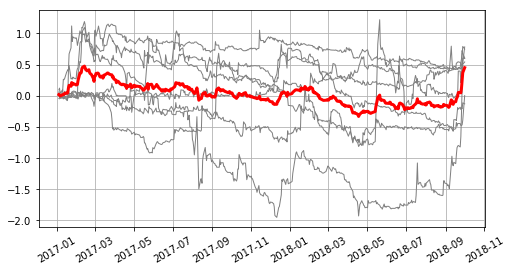

In [457]:
n = 1
plt.figure(figsize=(8,4))

for stock in clusters[n]:
    plt.plot(r[stock].cumsum(), 'gray', linewidth=1)

s = 'avg' + str(n)
plt.plot(r[s].cumsum(), 'red', linewidth=3);
plt.xticks(rotation=30);
plt.grid(True)

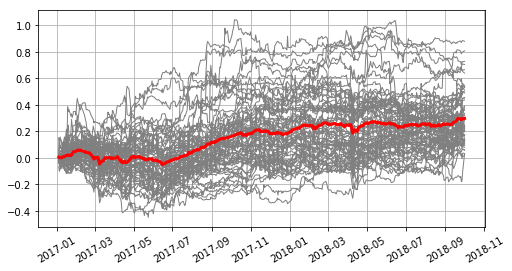

In [458]:
n = 2
plt.figure(figsize=(8,4))

for stock in clusters[n]:
    plt.plot(r[stock].cumsum(), 'gray', linewidth=1)

s = 'avg' + str(n)
plt.plot(r[s].cumsum(), 'red', linewidth=3);
plt.xticks(rotation=30);
plt.grid(True)

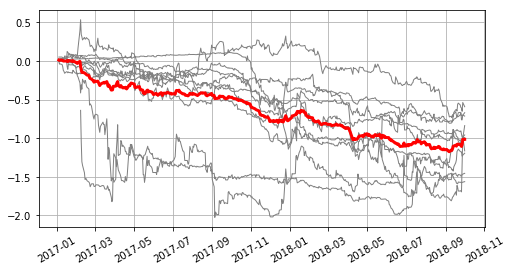

In [459]:
n = 3
plt.figure(figsize=(8,4))

for stock in clusters[n]:
    plt.plot(r[stock].cumsum(), 'gray', linewidth=1)

s = 'avg' + str(n)
plt.plot(r[s].cumsum(), 'red', linewidth=3);
plt.xticks(rotation=30);
plt.grid(True)

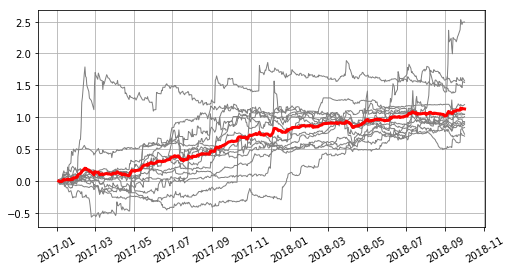

In [460]:
n = 4
plt.figure(figsize=(8,4))

for stock in clusters[n]:
    plt.plot(r[stock].cumsum(), 'gray', linewidth=1)

s = 'avg' + str(n)
plt.plot(r[s].cumsum(), 'red', linewidth=3);
plt.xticks(rotation=30);
plt.grid(True)

Из приведенных графиков видно, что для составления портфеля необходимо выбирать акции, входящие в кластеры 2 и 4, т.к. средняя доходности показывает стабильный рост на всем анализируемом периоде.

При этом через определенные промежутки (например раз в квартал) необходимо проводить ребалансировку портфеля - заново запускать алгоритм кластеризации и добавлять в портфель (или удалять из него) акции, которые переходят из одного кластера в другой

Список акций, входяших в кластеры 2 и 4 приведен ниже

In [464]:
clusters[2]

['RUAL',
 'YNDX',
 'QIWI',
 'UNAC',
 'DZRDP',
 'DIOD',
 'AVAZ',
 'ALRS',
 'AKRN',
 'AMEZ',
 'BANEP',
 'VSMO',
 'VZRZP',
 'GAZP',
 'GMKN',
 'SIBN',
 'DSKY',
 'IRAO',
 'KMAZ',
 'KRSBP',
 'LKOH',
 'LSNGP',
 'LSNG',
 'MVID',
 'CBOM',
 'MAGN',
 'MRKZ',
 'MRKU',
 'MRKP',
 'MRKV',
 'MRKS',
 'MRKY',
 'MTSS',
 'MFON',
 'MRSB',
 'MSTT',
 'NKNCP',
 'NLMK',
 'NMTP',
 'NVTK',
 'KZOS',
 'PIKK',
 'PMSBP',
 'PMSB',
 'ROST',
 'RASP',
 'ROSB',
 'ROSN',
 'RNFT',
 'KRKNP',
 'SBER',
 'SBERP',
 'CHMF',
 'SELG',
 'SELGP',
 'STSB',
 'STSBP',
 'SNGSP',
 'TGKN',
 'TGKB',
 'TATN',
 'TTLK',
 'TRCN',
 'PHOR',
 'HIMCP',
 'GCHE',
 'ENRU',
 'RKKE']

In [465]:
clusters[4]

['AVAZP',
 'FESH',
 'DVEC',
 'OPIN',
 'IRKT',
 'KROTP',
 'KBTK',
 'MGTSP',
 'MGTS',
 'KZOSP',
 'AQUA',
 'TGKBP',
 'TATNP',
 'CNTLP']